# Basic Stock Trading

In [1]:
# importing libraries

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
# define the ticker symbol
tickersymbol = "MSFT"

In [3]:
#get the data on this ticker
tickerData = yf.Ticker(tickersymbol)

In [4]:
#get the price for this ticker
ticker_df = tickerData.history(interval= "1d", start = "2019-1-1", end = "2021-12-1")

In [5]:
ticker_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-12-31,97.946810,99.020174,97.124867,98.217567,33173800,0.0,0
2019-01-02,96.264252,98.391636,95.674385,97.782433,35329300,0.0,0
2019-01-03,96.796100,96.883133,93.991816,94.185219,42579100,0.0,0
2019-01-04,96.428626,99.126540,95.664700,98.565681,44060600,0.0,0
2019-01-07,98.285248,99.861445,97.647036,98.691383,35656100,0.0,0
...,...,...,...,...,...,...,...
2021-11-23,337.049988,339.450012,333.559998,337.679993,30427600,0.0,0
2021-11-24,336.279999,338.160004,333.910004,337.910004,21661300,0.0,0
2021-11-26,334.350006,337.929993,328.119995,329.679993,24217200,0.0,0


In [6]:
ticker_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 736 entries, 2018-12-31 to 2021-11-30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          736 non-null    float64
 1   High          736 non-null    float64
 2   Low           736 non-null    float64
 3   Close         736 non-null    float64
 4   Volume        736 non-null    int64  
 5   Dividends     736 non-null    float64
 6   Stock Splits  736 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 46.0 KB


In [34]:
priceData = ticker_df.Open

In [35]:
priceData

Date
2018-12-31     97.946810
2019-01-02     96.264252
2019-01-03     96.796100
2019-01-04     96.428626
2019-01-07     98.285248
                 ...    
2021-11-23    337.049988
2021-11-24    336.279999
2021-11-26    334.350006
2021-11-29    334.940002
2021-11-30    335.320007
Name: Open, Length: 736, dtype: float64

In [8]:
priceData = priceData.asfreq(pd.infer_freq(priceData.index))

In [9]:
priceData

Date
2018-12-31     97.946810
2019-01-01           NaN
2019-01-02     96.264252
2019-01-03     96.796100
2019-01-04     96.428626
                 ...    
2021-11-26    334.350006
2021-11-27           NaN
2021-11-28           NaN
2021-11-29    334.940002
2021-11-30    335.320007
Freq: D, Name: Open, Length: 1066, dtype: float64

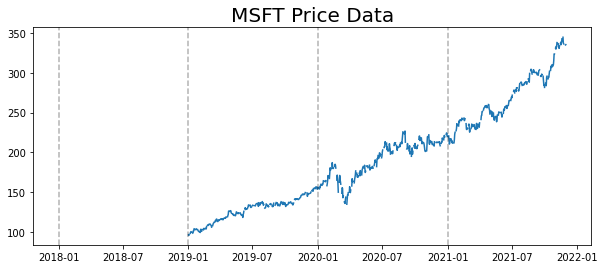

In [10]:
plt.figure(figsize = (10,4))
plt.plot(priceData)

plt.title("%s Price Data"%tickersymbol, fontsize = 20)

for year in range(priceData.index[0].year, priceData.index[-1].year+1):
    plt.axvline(datetime(year,1,1), color = "k", linestyle = "--", alpha = 0.3)

# Basic Buying Protocol:
- Buy if stock increasing for $b$ consecutive days

# Basic Selling Protocols:
- Sell if stock decreasing for $s$ consecutive days (and we've made a profit)

In [11]:
def get_buying_selling_days(price_data, b,s):
    
    #get the pct change day after day
    pct_change = price_data.pct_change()[1:]
    
    #this function checks the buying conditions
    def buying_condition(sub_series):
        return (sub_series > 0).all()
    
    #this function checks the selling condition
    def selling_condition(sub_series):
        return (sub_series < 0).all()
    
    #get all the buying days from the data
    buying_days  = pct_change.rolling(b).apply(buying_condition)
    
    #get the potential selling days in the data
    selling_days = pct_change.rolling(s).apply(selling_condition)
    
    return {"buying_days": buying_days, "potential_selling_days":selling_days}

In [12]:
info_dict = get_buying_selling_days(priceData, 4,1)
info_dict

{'buying_days': Date
 2019-01-01    NaN
 2019-01-02    NaN
 2019-01-03    NaN
 2019-01-04    0.0
 2019-01-05    0.0
              ... 
 2021-11-26    0.0
 2021-11-27    0.0
 2021-11-28    0.0
 2021-11-29    0.0
 2021-11-30    0.0
 Freq: D, Name: Open, Length: 1065, dtype: float64,
 'potential_selling_days': Date
 2019-01-01    0.0
 2019-01-02    1.0
 2019-01-03    0.0
 2019-01-04    1.0
 2019-01-05    0.0
              ... 
 2021-11-26    1.0
 2021-11-27    0.0
 2021-11-28    0.0
 2021-11-29    0.0
 2021-11-30    0.0
 Freq: D, Name: Open, Length: 1065, dtype: float64}

In [13]:
buying_days = info_dict["buying_days"]
potential_selling_days = info_dict["potential_selling_days"]

In [14]:
potential_selling_days

Date
2019-01-01    0.0
2019-01-02    1.0
2019-01-03    0.0
2019-01-04    1.0
2019-01-05    0.0
             ... 
2021-11-26    1.0
2021-11-27    0.0
2021-11-28    0.0
2021-11-29    0.0
2021-11-30    0.0
Freq: D, Name: Open, Length: 1065, dtype: float64

In [15]:
df_stocks = pd.DataFrame(index = buying_days.index)
df_stocks

""
Date
2019-01-01
2019-01-02
2019-01-03
2019-01-04
2019-01-05
...
2021-11-26
2021-11-27
2021-11-28


In [16]:
#populate df with buying days and possible selling days

df_stocks["buying_day"] = (buying_days==1)
df_stocks["potential_selling_day"] = (potential_selling_days == 1)
df_stocks["price"] = priceData

In [17]:
df_stocks

,buying_day,potential_selling_day,price
Date,,,
2019-01-01,False,False,NaN
2019-01-02,False,True,96.264252
2019-01-03,False,False,96.796100
2019-01-04,False,True,96.428626
2019-01-05,False,False,NaN
...,...,...,...
2021-11-26,False,True,334.350006
2021-11-27,False,False,NaN
2021-11-28,False,False,NaN


In [18]:
#only keeping days that are buying or possible selling days

df_stocks = df_stocks[(df_stocks.buying_day | df_stocks.potential_selling_day)]


In [19]:
df_stocks.head()

,buying_day,potential_selling_day,price
Date,,,
2019-01-02,False,True,96.264252
2019-01-04,False,True,96.428626
2019-01-10,False,True,99.813110
2019-01-11,False,True,99.784102
2019-01-14,False,True,98.536682


In [20]:
def check_cum_pct_change(price_data, buy_date, potential_selling_date):
    
    """
    This helper function will check if the cumulative percent change
    between a buying and potential selling day yields overall growth
    """
    #get the pct change day after day
    pct_change = price_data.pct_change()[1:]
    
    sub_series = 1+ pct_change[buy_date+timedelta(hours = 1):potential_selling_date]
    
    return sub_series.product() > 1
    

In [27]:
def get_investing_result(df_stocks, starting_funds, verbose = False):
    
    #get a copy of price data
    price_data = df_stocks.price
    
    #at start not holding any shares
    holding = False
    
    current_funds = starting_funds
    current_shares = 0
    last_buy_date = None
    
    #init dict of buying and selling date
    events_list = []
    
    #for each buying and potential selling date
    for date, data in df_stocks.iterrows():
        
        #if not holding any shares and this a buying day
        if (not holding) and data.buying_day:
            
            #calculate the shares can buy
            num_shares_to_buy = int(current_funds)/data.price
            
            #update the number of shares
            current_shares += num_shares_to_buy
            
            #update current funds
            current_funds -= num_shares_to_buy *data.price
            
            #set last buy date
            last_buy_date = date
            events_list.append(("b",date))
            
            holding = True
            
            if verbose:
                print('Bought %s shares at $%s on %s totaling $%s'%\
                      (num_shares_to_buy, data.price, date.date(), round(num_shares_to_buy*data.price,2)))
        
        #if holding and it is potential selling dates       
        elif holding and data.potential_selling_day:
            
            #check to make sure we r making profit
            if check_cum_pct_change(price_data, last_buy_date,date):
                
                #add to current fund
                current_funds += current_shares * data.price
                
                if verbose:
                    print('Sold %s shares at $%s on %s totaling $%s'%\
                          (current_shares, data.price, date.date(), round(num_shares_to_buy*data.price,2)))
                    print('--------------------------------------')
                    
                #reset current shares
                current_shares = 0
                
                #update the holding 
                holding = False
                
                events_list.append(("s", date))
                
    #get the stock price at the end of the time span
    final_stock_price = price_data[-1]
    
    #get the final total value(fund + stock value)
    final_value = current_funds + final_stock_price * current_shares
    
    #return the percent change 
    return round((final_value - starting_funds)/starting_funds, 2), events_list
            
        

In [28]:
percent_change, events_list = get_investing_result(df_stocks, 10000, True)

Bought 89.90177621971378 shares at $111.23250752644402 on 2019-03-14 totaling $10000.0
Sold 89.90177621971378 shares at $114.00022141798603 on 2019-03-20 totaling $10248.82
--------------------------------------
Bought 87.86615081138832 shares at $116.63194421704151 on 2019-04-04 totaling $10248.0
Sold 87.86615081138832 shares at $117.73902120128162 on 2019-04-17 totaling $10345.27
--------------------------------------
Bought 81.91325663053244 shares at $126.3043422466446 on 2019-04-25 totaling $10346.0
Sold 81.91325663053244 shares at $128.07800499826612 on 2019-06-12 totaling $10491.29
--------------------------------------
Bought 78.30563647150207 shares at $133.97503005825143 on 2019-06-20 totaling $10491.0
Sold 78.30563647150207 shares at $135.446870425559 on 2019-07-16 totaling $10606.25
--------------------------------------
Bought 78.21273808673755 shares at $135.60450969301186 on 2019-08-22 totaling $10606.0
Sold 78.21273808673755 shares at $136.51404836814947 on 2019-09-09 t

In [31]:
print(percent_change)

0.25


(91.0, 361.0)

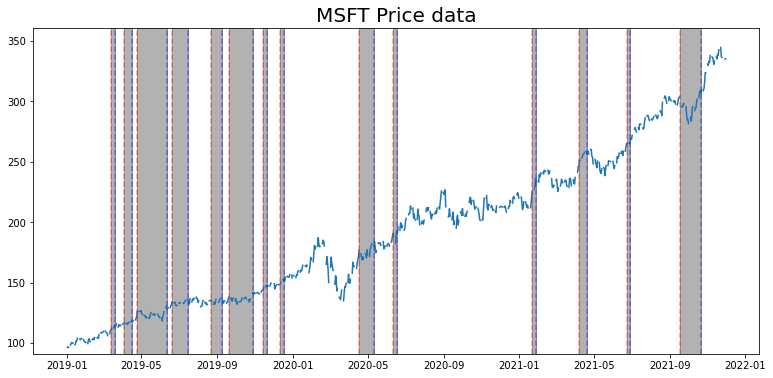

In [33]:
#plotting the result

plt.figure(figsize = (13,6))
plt.plot(priceData)

y_lims = (int(priceData.min()*.95), int(priceData.max()*1.05))
shaded_y_lims = int(priceData.min()*.5) , int(priceData.max()*1.5)

for idx, event in enumerate(events_list):
    color = "red" if event[0] == "b" else "blue"
    plt.axvline(event[1] , color = color, linestyle = "--",alpha = 0.4)
    
    if event[0] == "s":
        plt.fill_betweenx(range(*shaded_y_lims), event[1], events_list[idx-1][1], color = "k", alpha = 0.3)
        
        
plt.title("%s Price data"%tickersymbol, fontsize = 20)
plt.ylim(*y_lims)